In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams, cm
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [9]:
H = 0.25
L = 1

alpha = 207 #Volume expansion coefficient of water @ 20 C
k = 0.6     #Thermal conductivity of water @ 20 C
v = 0.894   # viscosity of water     change to matrix

ReC = 1100.65 #Critical Rayleigh number for one free and one rigid boundary condition
g = 9.81
D = 0.143E-6  #Thermal diffusivity of water
rho_i = 1.105   #Density of water @ 20 C
R = 287        #Cp - Cv for water change later

delT = (ReC*v*k)/(alpha*g*H**3)

L = 1
H = 0.001

nxy = 101
nt = 500

dxy = L/(nxy-1)

x = np.linspace(0,L,nxy)
y = np.linspace(0,H,nxy)

#Change to Kelivin?
To = 20
Ti = np.ones((nxy, nxy))*To
Ti[0,:] = 20 + delT

rho = np.ones((nxy,nxy), dtype=float)*rho_i
rho[0,:] = rho_i*(1-alpha*(Ti[0,:] - To))

pi = np.zeros((nxy,nxy), dtype=float)
pi[:,:] = Ti[:,:]*rho[0:,0:] * R

ui = np.zeros((nxy,nxy), dtype=float)

print('To =',delT, 'Tl =',20+delT)
#print('x =', x, 'y =', y)

To = 18.6070972831627 Tl = 38.6070972831627


In [10]:
# stability
sigma = 0.00005
dt = sigma*min(dxy,dxy)**2/D

print(dt)

0.03496503496503497


In [11]:
print(dxy)

0.01


In [12]:
def ftcs(T, To, u, p, rho, rho_i, alpha, k, g, y, nt, dt, dxy):
    
    for n in range(nt):
        un = u.copy()
        Tn = T.copy()
        Pn = p.copy
        
        T[1:-1,1:-1] = Tn[1:-1,1:-1] + dt*((un[1:-1,1:-1]/dxy)*(Tn[2:,1:-1]\
                    + Tn[1:-1,2:] - (2*Tn[1:-1,1:-1])) + 
                    (k/dxy**2)*(Tn[2:,1:-1] + Tn[:-2,1:-1] + Tn[1:-1,2:]\
                    + Tn[1:-1,:-2] - (4*Tn[1:-1,1:-1])))
        
        rho[1:-1,1:-1] = rho_i*(1- alpha*(T[1:-1,1:-1] - 20))
        p[1:-1,1:-1] = rho[1:-1,1:-1]*y[1:-1] * g
        
        
        u[1:-1,1:-1] = un[1:-1,1:-1] + dt*(-(1/rho_i)*(p[2:,1:-1] + p[1:-1,2:] - 2*p[1:-1,1:-1]) + (rho[1:-1,1:-1]*g/rho_i)\
                                           + (u[1:-1,1:-1]/dxy)*(0.5*(u[2:,1:-1] - u[:-2,1:-1] \
                                                                      + u[1:-1,2:] - u[1:-1,:-2]) \
                                           + (1/dxy)*(u[2:,1:-1] + u[:-2,1:-1] + u[1:-1,2:] + u[1:-1,:-2] - 4*u[1:-1,1:-1])))
                                           
    return T

In [13]:
T = ftcs(Ti,To,ui,pi,rho,rho_i,alpha,k,g,y,nt,dt,dxy)

C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: overflow encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: invalid value encountered in subtract
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: RuntimeWarning: overflow encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in subtract
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: RuntimeWarning: invalid value encountered in multiply
C:\Users\amiya\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: RuntimeWarning: invalid value encountered in add
C:\Users\amiya\Anaconda3\lib\site-packages\ip

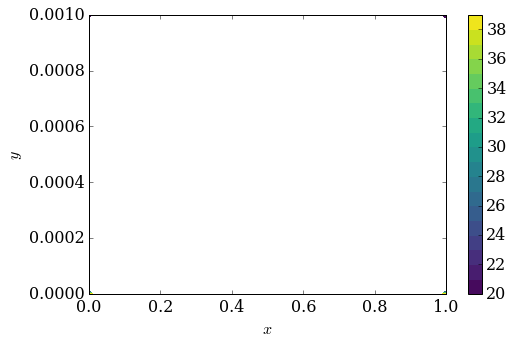

In [14]:
plt.figure(figsize=(8,5))
plt.contourf(x,y,T,20,cmap=cm.viridis)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.colorbar();
